# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Import your libraries:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Your code here
boston_housing_df = pd.read_csv('boston_data.csv')
boston_housing_df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.15876   0.0  10.81   0.0  0.413  5.961  17.5  5.2873  4.0  305.0   
1  0.10328  25.0   5.13   0.0  0.453  5.927  47.2  6.9320  8.0  284.0   
2  0.34940   0.0   9.90   0.0  0.544  5.972  76.7  3.1025  4.0  304.0   
3  2.73397   0.0  19.58   0.0  0.871  5.597  94.9  1.5257  5.0  403.0   
4  0.04337  21.0   5.64   0.0  0.439  6.115  63.0  6.8147  4.0  243.0   

   ptratio   black  lstat  medv  
0     19.2  376.94   9.88  21.7  
1     19.7  396.90   9.22  19.6  
2     18.4  396.24   9.97  20.3  
3     14.7  351.85  21.45  15.4  
4     16.8  393.97   9.43  20.5

In [3]:
boston_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [4]:
boston_housing_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
boston_housing_df.describe()

crim          zn       indus        chas         nox         rm  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.00000   
mean     3.730912   10.509901   11.189901    0.069307    0.556710    6.30145   
std      8.943922   22.053733    6.814909    0.254290    0.117321    0.67583   
min      0.006320    0.000000    0.460000    0.000000    0.392000    3.56100   
25%      0.082382    0.000000    5.190000    0.000000    0.453000    5.90275   
50%      0.253715    0.000000    9.795000    0.000000    0.538000    6.23050   
75%      4.053158   12.500000   18.100000    0.000000    0.631000    6.62925   
max     88.976200   95.000000   27.740000    1.000000    0.871000    8.78000   

              age         dis         rad         tax     ptratio       black  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    68.601733    3.799666    9.836634  411.688119   18.444554  355.068243   
std     28.066143    2.109916    8.834741  171.073553    2.150295   94.489572   
min      2.900000    1.169100    1.000000  187.000000   12.600000    0.320000   
25%     45.800000    2.087875    4.000000  281.000000   17.375000  374.710000   
50%     76.600000    3.207450    5.000000  330.000000   19.000000  391.065000   
75%     94.150000    5.222125   24.000000  666.000000   20.200000  396.007500   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  404.000000  404.000000  
mean    12.598936   22.312376  
std      6.925173    8.837019  
min      1.730000    5.000000  
25%      7.135000   17.100000  
50%     11.265000   21.400000  
75%     16.910000   25.000000  
max     34.370000   50.000000

In [6]:
fig = make_subplots(rows=boston_housing_df.shape[1], cols=2)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkblue','pink','yellow','lightgrey','lightblue','cyan', 'magenta', 'lime', 'brown']

# Create a loop for histogram plots
for i, col in enumerate(boston_housing_df.columns):
    fig.add_trace(go.Histogram(x=boston_housing_df[col], name=col, marker=dict(color=colors[i])), row=i+1, col=1)

# Create a loop for box plots
for i, col in enumerate(boston_housing_df.columns):
    fig.add_trace(go.Box(x=boston_housing_df[col], name=col, marker=dict(color=colors[i])), row=i+1, col=2)

# Adjust the height, width, and title of the layout
fig.update_layout(height=200 * boston_housing_df.shape[1], width=1000, title_text="columns distributions")
fig.show()

observation: crim is positively skewed though crime rate is less but due to some outliers it is positvely skewed.similarly in case of zn, in case of chas most values lies in between -0.5 to 0.5 but few outliers on right side that skewed the graph positively,indus, nox, age, rad,tax,ptratio have normal distribution.rm have outlier in both side positive and negative side.dis have few outliers on right side.black is negatively skewed as outliers on negative side.lstat has only 2 outlier on right side.medv have few outliers on right side and only one outlier on left side.

In [7]:
from scipy import stats

# Calculate Z-scores for all columns
z_scores_all_columns = stats.zscore(boston_housing_df)

# Identify outliers using a threshold (e.g., 3 standard deviations)
outliers_all_columns = (z_scores_all_columns > 3) | (z_scores_all_columns < -3)

# Display the number of outliers for each column
outliers_counts = outliers_all_columns.sum(axis=0)
print("Number of outliers for each column:")
print(outliers_counts)

Number of outliers for each column:
crim        7
zn         19
indus       0
chas       28
nox         0
rm          7
age         0
dis         5
rad         0
tax         0
ptratio     0
black      21
lstat       2
medv       12
dtype: int64


In [8]:
print(boston_housing_df[['zn','black','medv']].mean())

# 1. Get the IQR
IQR = boston_housing_df[['zn','black','medv']].quantile(0.75) - boston_housing_df[['zn','black','medv']].quantile(0.25)
print(IQR)

# 2. Get the bounds
lower_bound = boston_housing_df[['zn','black','medv']].quantile(0.25) - IQR * 1.5
upper_bound = boston_housing_df[['zn','black','medv']].quantile(0.75) + IQR * 1.5

# 2. Create pandas condition
condition_1 = boston_housing_df[['zn','black','medv']] < lower_bound
condition_2 = boston_housing_df[['zn','black','medv']] > upper_bound

# 3. Apply to profit column
boston_housing_cleaned = boston_housing_df[~(condition_1 | condition_2).any(axis=1)]
boston_housing_cleaned

zn        10.509901
black    355.068243
medv      22.312376
dtype: float64
zn       12.5000
black    21.2975
medv      7.9000
dtype: float64


crim    zn  indus  chas    nox     rm   age     dis   rad    tax  \
0    0.15876   0.0  10.81   0.0  0.413  5.961  17.5  5.2873   4.0  305.0   
1    0.10328  25.0   5.13   0.0  0.453  5.927  47.2  6.9320   8.0  284.0   
2    0.34940   0.0   9.90   0.0  0.544  5.972  76.7  3.1025   4.0  304.0   
3    2.73397   0.0  19.58   0.0  0.871  5.597  94.9  1.5257   5.0  403.0   
4    0.04337  21.0   5.64   0.0  0.439  6.115  63.0  6.8147   4.0  243.0   
..       ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
396  0.06899   0.0  25.65   0.0  0.581  5.870  69.7  2.2577   2.0  188.0   
397  0.10084   0.0  10.01   0.0  0.547  6.715  81.6  2.6775   6.0  432.0   
398  0.67191   0.0   8.14   0.0  0.538  5.813  90.3  4.6820   4.0  307.0   
399  9.32909   0.0  18.10   0.0  0.713  6.185  98.7  2.2616  24.0  666.0   
403  0.08244  30.0   4.93   0.0  0.428  6.481  18.5  6.1899   6.0  300.0   

     ptratio   black  lstat  medv  
0       19.2  376.94   9.88  21.7  
1       19.7  396.90   9.22  19.6  
2       18.4  396.24   9.97  20.3  
3       14.7  351.85  21.45  15.4  
4       16.8  393.97   9.43  20.5  
..       ...     ...    ...   ...  
396     19.1  389.15  14.37  22.0  
397     17.8  395.59  10.16  22.8  
398     21.0  376.88  14.81  16.6  
399     20.2  396.90  18.13  14.1  
403     16.6  379.41   6.36  23.7  

[271 rows x 14 columns]

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

<Axes: >

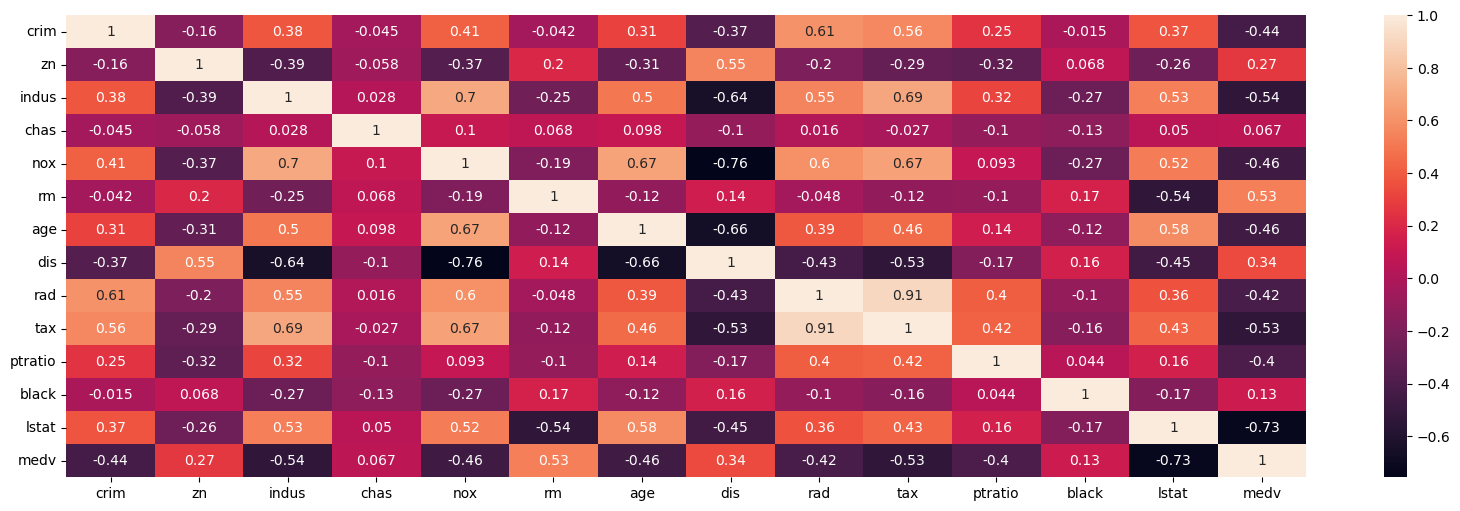

In [9]:
# Your plots here
boston_housing_cleaned_corr = boston_housing_cleaned.corr()

plt.figure(figsize=(20, 6))
sns.heatmap(boston_housing_cleaned_corr, annot=True)

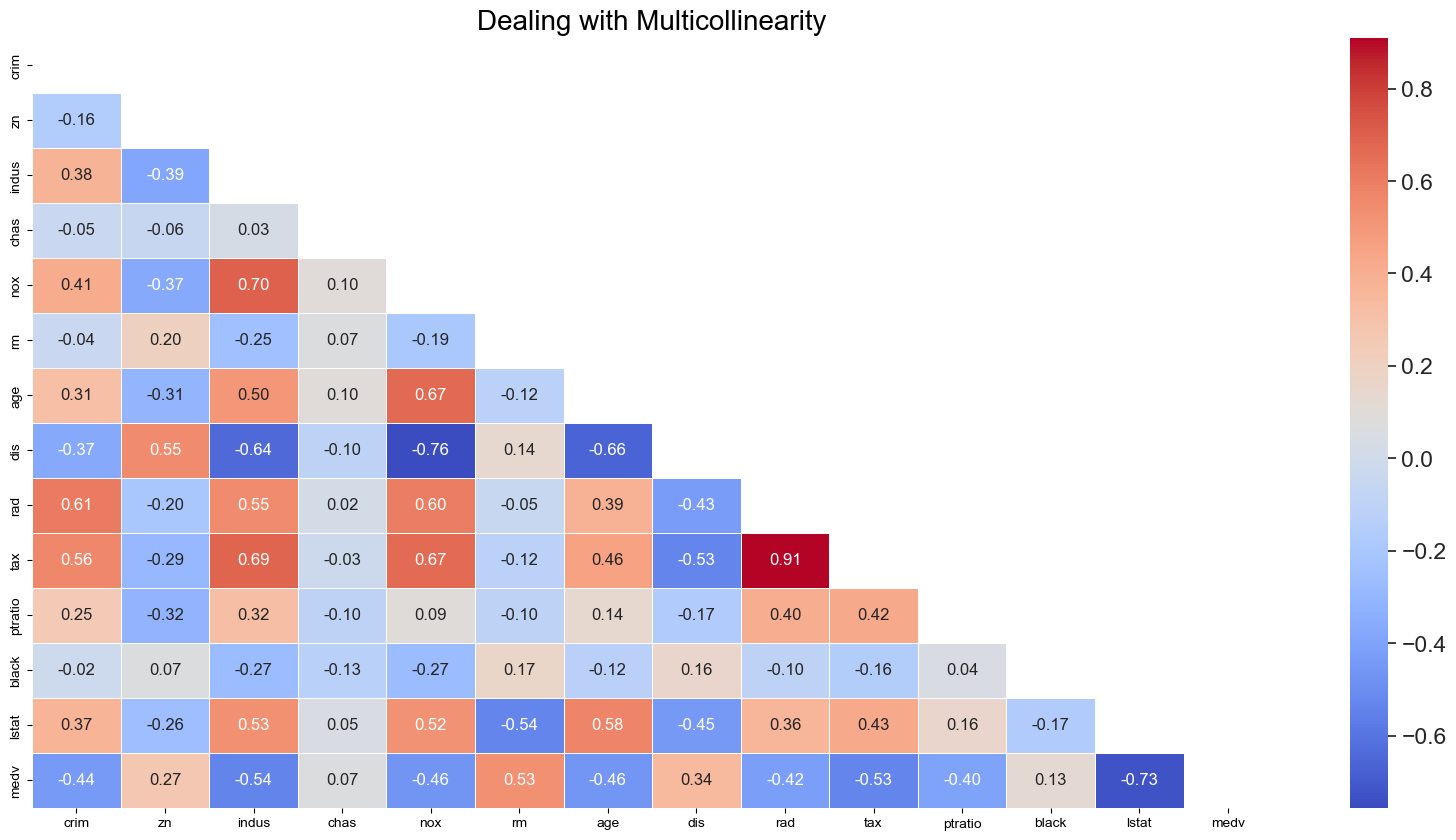

In [10]:
import plotly.express as px
mask = np.zeros_like(boston_housing_cleaned_corr)
mask[np.triu_indices_from(mask)] = True # to hide half of the matrix
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)
ax = sns.heatmap(boston_housing_cleaned_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title("Dealing with Multicollinearity", fontsize=20)
plt.show()

In [11]:
# nox  and age are collinear so we can drop one column.
boston_housing_cleaned = boston_housing_cleaned.copy()
boston_housing_cleaned.drop('nox',axis=1,inplace=True)

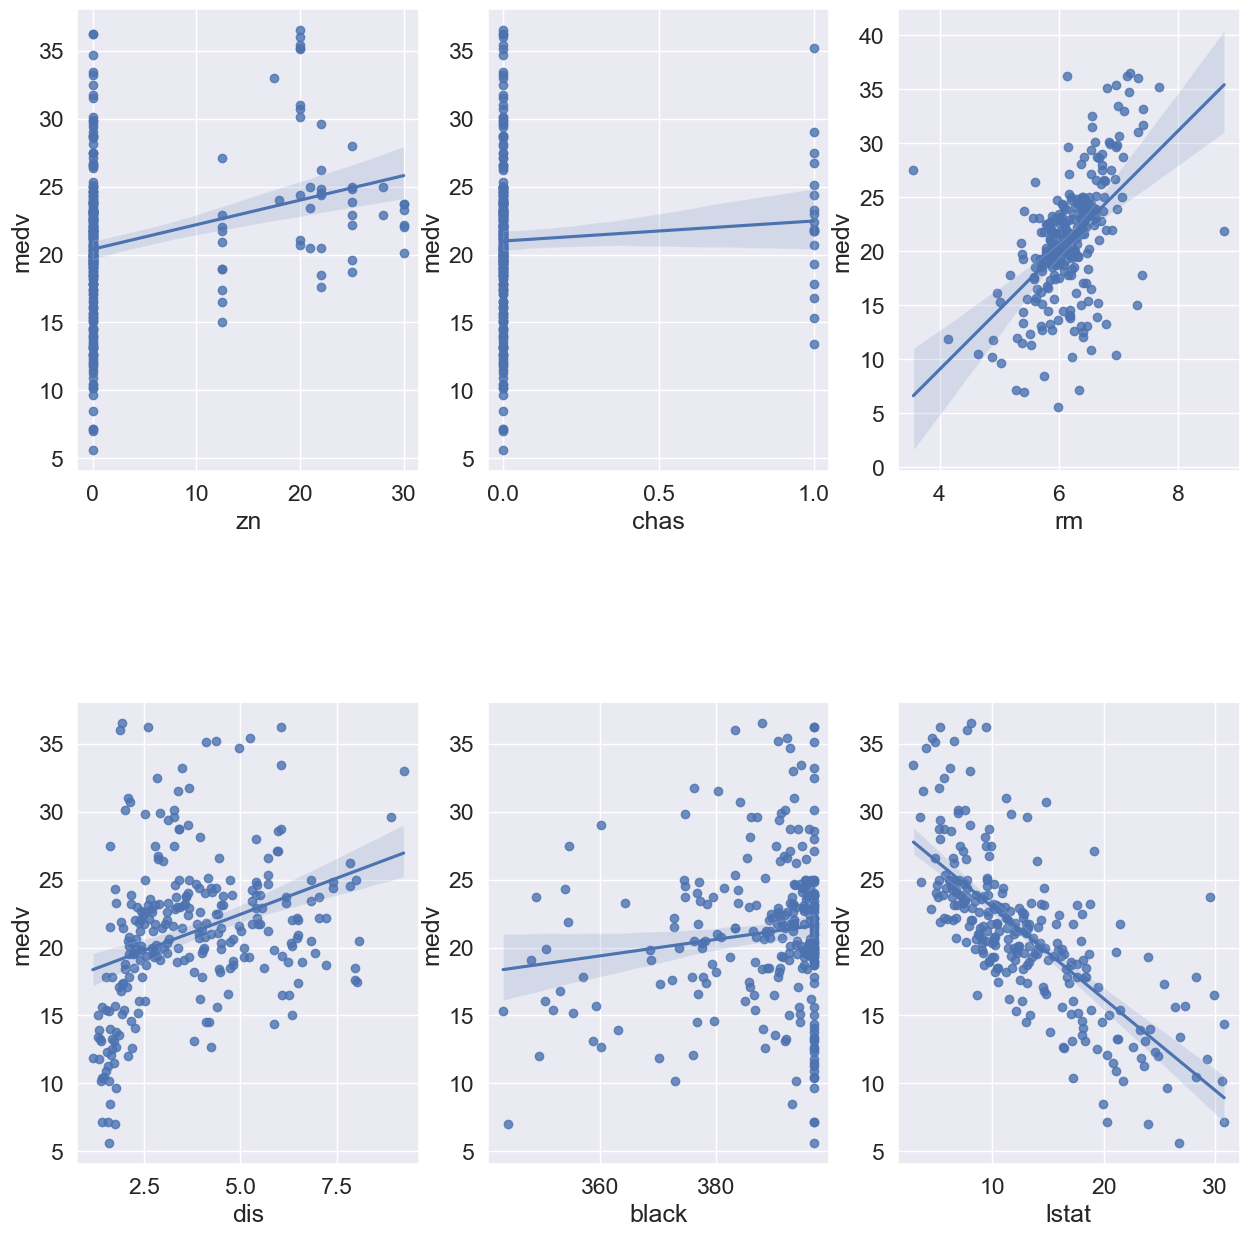

In [12]:
# highly correlated columns are:medv,zn,chas,rm,dis,black and lstat
selected_columns = ['zn', 'chas', 'rm', 'dis', 'black','lstat']
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Create scatter plots with regression lines
for i, col in enumerate(selected_columns):
    row, col_index = divmod(i, 3)
    sns.regplot(x=col, y='medv', data=boston_housing_cleaned, ax=axes[row, col_index])

# Show the plots
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
These plots shows that prices of homes of Boston are positively correlated with 'zn', 'chas', 'rm', 'dis', 'black'and negatively correalted with Lstat.
Yes,I was expected to see the same relationships in these variables.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

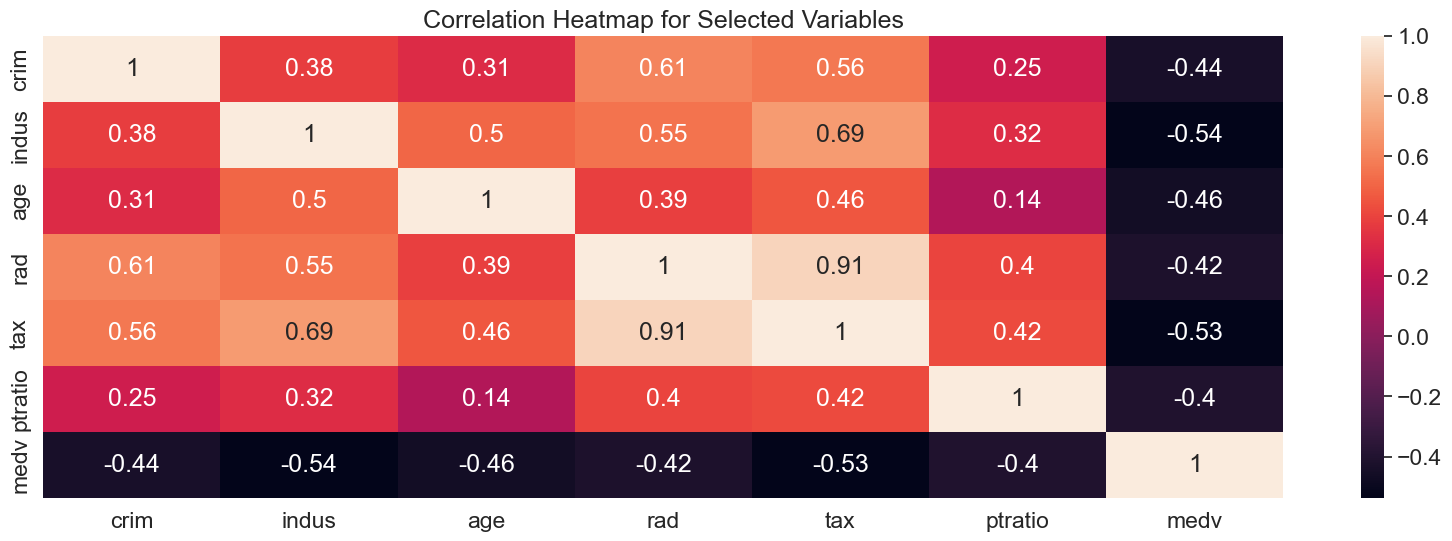

In [12]:
boston_housing = boston_housing_cleaned[['crim', 'indus', 'age', 'rad', 'tax', 'ptratio', 'medv']]
boston_housing_corr = boston_housing.corr()

plt.figure(figsize=(20, 6))
sns.heatmap(boston_housing_corr, annot=True)
plt.title("Correlation Heatmap for Selected Variables")
plt.show()

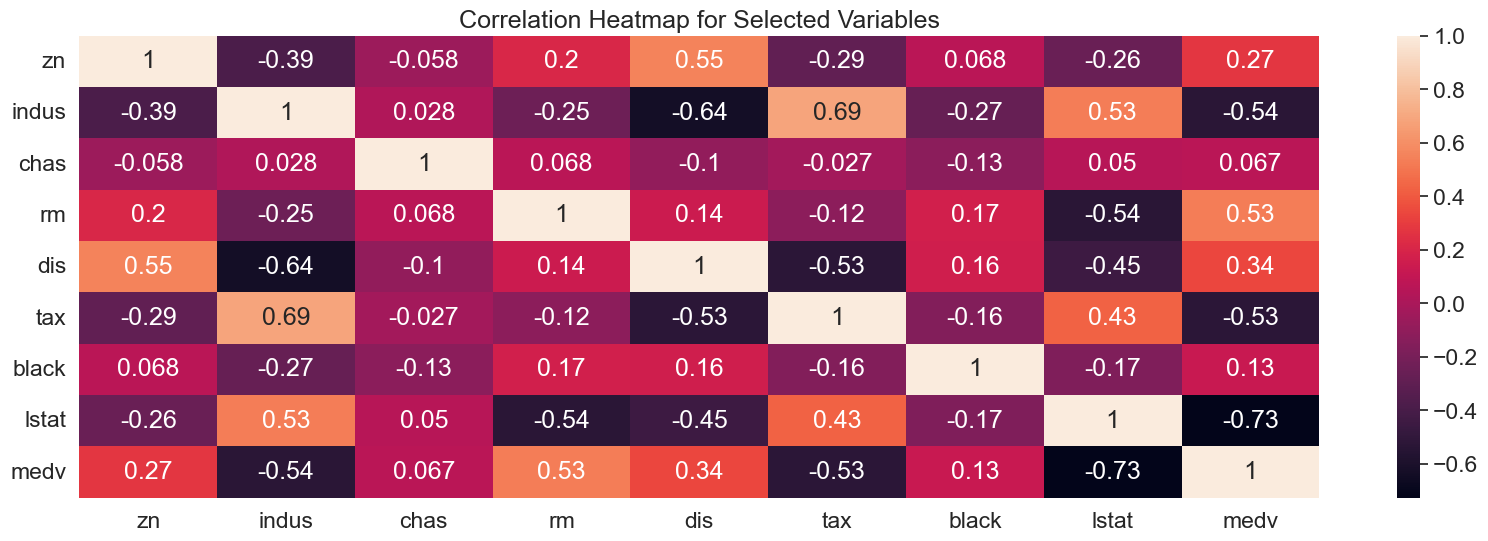

In [13]:
# Your response here
# I think indus and tax are also highly correlated I could add them too.
selected_columns = ['zn','indus', 'chas', 'rm', 'dis', 'tax','black','lstat','medv']

boston_housing = boston_housing_cleaned[selected_columns]
boston_housing_corr = boston_housing.corr()

plt.figure(figsize=(20, 6))
sns.heatmap(boston_housing_corr, annot=True)
plt.title("Correlation Heatmap for Selected Variables")
plt.show()

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [14]:
# Your code here
boston_housing['medv'].describe()

count    271.000000
mean      21.093727
std        5.664771
min        5.600000
25%       18.300000
50%       21.200000
75%       23.900000
max       36.500000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [15]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = r2_score(y_true, y_predict) 
    return score
    # Your code here:

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [16]:
# Your code here
# X-y split
X = boston_housing.drop(columns=['medv'], axis=1)
y = boston_housing['medv']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [17]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
max_depth_values = [2, 4, 6, 8,10]

for max_depth_value in max_depth_values:
    rf_model = RandomForestRegressor(n_estimators=10, max_depth=max_depth_value, random_state=42) 
                                
    rf_model.fit(X_train, y_train)
    print('Train score:', rf_model.score(X_train, y_train))
    print('Test score:', rf_model.score(X_test, y_test))

Train score: 0.7227250901974416
Test score: 0.6227757668495035
Train score: 0.8630389469996586
Test score: 0.6800100507173306
Train score: 0.9146638946049983
Test score: 0.6813586010171067
Train score: 0.9320625102952554
Test score: 0.6653309421033545
Train score: 0.9419931704432106
Test score: 0.6706237428895332


Now, plot the score for each tree on the training set and on the testing set.

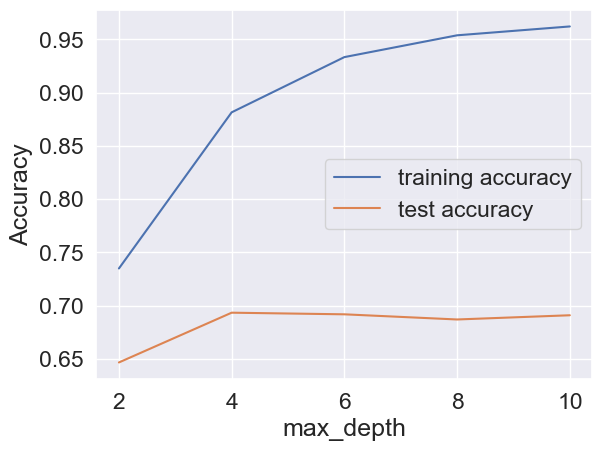

In [18]:
# Produce a plot with the score for the testing and training for the different max depths
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

max_depth = [2,4,6,8,10]
test = []
train = []

for depth in max_depth:
    model = RandomForestRegressor(max_depth= depth,random_state=42)
    model.fit(X_train, y_train)
    train.append(model.score(X_train,y_train))
    test.append(model.score(X_test,y_test))
    

plt.plot(max_depth_values, train, label="training accuracy")
plt.plot(max_depth_values, test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()  
plt.show()
    

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
The results tell that at max_depth- 4 the model is giving best output, because after that 
the test accuracy is going down and it shows that model is overfitting.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [20]:
# Your response here
When the model is trained with maximum depth of 1 then the model will suffer with high bias and low variance.
On the other hand when model is trained with maximum depth of 10 then the model will suffer with low bias and high variance. 
This is because, maximum depth 1 means shallow model or we can say very simple model and when model is shallow then it is
unable to capture the underlying pattern in the data and that leads to systematic errors or high bias. But when model have
max depth of 10, it mean model is deep and more complex and able to capture the underlying pattern of testing data, so it 
leads to low bias(error) but with the increase of complexity of model it become sensitive to noise and variation in training data 
So it will lead high variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [22]:
# Your response here
Max_depth parameter tells about the complexity of model, if max_depth is less the model is shallow and simple. But if the
max_depth is more, the model is deeper and complex. As we have already run the model with different max_depth values: 2,4,6,8,10
and we obseved that at max_depth-4, we wre getting the optimal value. After that the trainng accuracy is increasing but the 
testing accuracy is decreasing.It shows that beyond the max_depth-4, the model is starting overfitting.So in this case max_depth-4
would optimize the model.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
*The constructed model should not be used in a real-world setting.This is because if data was collected from 1978 will not be relevant today
because the things has changed alot in these years like:lots of development has occurred, the housing price and requirement has changed
ecomomic conditions has changed. 
*No the features present in the data is not sufficient to describe a home. Lots of information are missing in the dataset like
Internal and external conditions of house for example: house are energy efficient or not,is it insulated or not, when it was last renovated or is
there any renovation work has been done or not, what is the quality of construction, types of flooring, kitchen aminities, what facilities are available
nearby homes like parks, shopping centre, schools, universities etc.
* I don't think model is robust to make consistent predictions as this data set is related to urban city. So model might not 
good in predicting abot rural settings.
* I don't think that data collected in an urban city like Boston would be applicable in a rural city too. because there is
lots of difference in life style of urban and rural areas like house size are different. As in rural areas houses are big but in low price
because they have less facilities of transporation, job opportunities,schools and college and other facilities like shopping etc.